# Notes
Implemented earlystopping with val_loss 

From, https://stackoverflow.com/questions/43906048/keras-early-stopping
It is likely that val_loss is happening on test sets specified in this notebook
"Monitor the validation loss (need to use cross validation or at least train/test sets) by setting the monitor argument to 'val_loss'."

In [1]:
# import the right libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [2]:
column_names = list(range(187))
print(column_names)

column_names.append('arrythmia_type')
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,

In [3]:
data_path =r'C:\Users\iamga\OneDrive\Desktop\Desktop_folder\Data_Science\Springboard\Data\heartbeat'

print(data_path)

C:\Users\iamga\OneDrive\Desktop\Desktop_folder\Data_Science\Springboard\Data\heartbeat


In [4]:
# load the training data

    
df_train = pd.read_csv(data_path+'\mitbih_train.csv', header=None, names=column_names)

print(df_train.shape)
df_train.head()

# load the testing data

df_test = pd.read_csv(data_path+'\mitbih_test.csv', header=None, names=column_names)

print(df_test.shape)
df_test.head()

(87554, 188)
(21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,arrythmia_type
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
predictors_train = df_train.drop(labels=['arrythmia_type'], axis=1)

predictors_train.shape

target_train = to_categorical(df_train.arrythmia_type)
target_train.shape

predictors_test = df_test.drop(labels=['arrythmia_type'], axis=1)

predictors_test.shape

target_test = to_categorical(df_test.arrythmia_type)
target_test.shape

(21892, 5)

In [6]:
(number_training_datapoints, number_features) = predictors_train.shape
number_features

187

### Trying F1 score from 
https://stackoverflow.com/questions/45411902/how-to-use-f1-score-with-keras-model


In [7]:
import keras.backend as K

def f1_score(y_pred, y_true):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score 

In [8]:

# create a 1 layer network

n_cols = 187

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=[n_cols,]))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_score])

In [9]:
# fit the model with training data
model.fit(predictors_train, target_train)

Epoch 1/1
87554/87554 [==============================] - 4s 42us/step - loss: 0.3803 - acc: 0.8963 - f1_score: nan


In [10]:
# make prediction on test data

model.evaluate(predictors_test, target_test)

21892/21892 [==============================] - 1s 29us/step


[0.2831733916890745, 0.9179152201717522, nan]

In [11]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,arrythmia_type
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [12]:
sum(target_train)

array([72471.,  2223.,  5788.,   641.,  6431.], dtype=float32)

In [13]:
predictors_test_transpose = predictors_test.T

predictors_test_transpose.iloc[:,:10].shape



(187, 10)

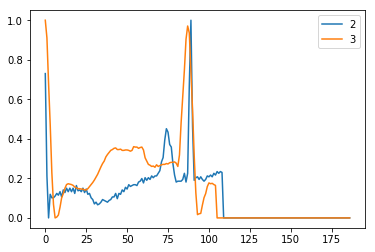

In [14]:
predictors_test_transpose.iloc[:,2:4].plot()
plt.show()

# Implement deep learning archtechture

In [15]:
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

In [16]:
# build model

model_CNN = Sequential()

model_CNN.add(Convolution1D(filters=32, kernel_size=5, activation='linear', input_shape=( number_features, 1)))


# 5 residual blocks
model_CNN.add(Convolution1D(filters=32, kernel_size=5, activation='relu'))
model_CNN.add(Convolution1D(filters=32, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=(5), strides=(2)))


# outermost layers
model_CNN.add(Dense(32, activation='relu'))
model_CNN.add(Flatten())
model_CNN.add(Dense(5, activation='softmax'))


# compile the model
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_score])

In [17]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 183, 32)           192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 179, 32)           5152      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 175, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 86, 32)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 86, 32)            1056      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2752)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 13765     
Total para

### Reshaping the input to the CNN so that the convolution1D can work
https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d/43399308#43399308

https://stackoverflow.com/questions/38656566/input-dimensions-to-a-one-dimensional-convolutional-network-in-keras

In [18]:
print(predictors_test.shape)

predictors_test_CNN = np.expand_dims(predictors_test, axis=2)

print(predictors_test_CNN.shape)

predictors_train_CNN = np.expand_dims(predictors_train, axis=2)
print(predictors_train_CNN.shape)


(21892, 187)
(21892, 187, 1)
(87554, 187, 1)


In [19]:
target_train.shape

(87554, 5)

In [22]:
# fit the model with training data
CNN_history = model_CNN.fit(predictors_train_CNN, target_train, epochs=100, validation_data=(predictors_test_CNN, target_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=0)])

Train on 87554 samples, validate on 21892 samples
Epoch 1/100
87554/87554 [==============================] - 70s 796us/step - loss: 0.2000 - acc: 0.9454 - f1_score: nan - val_loss: 0.1272 - val_acc: 0.9660 - val_f1_score: 0.9659
Epoch 2/100
87554/87554 [==============================] - 73s 831us/step - loss: 0.1046 - acc: 0.9702 - f1_score: 0.9706 - val_loss: 0.1139 - val_acc: 0.9699 - val_f1_score: 0.9702
Epoch 3/100
87554/87554 [==============================] - 75s 851us/step - loss: 0.0830 - acc: 0.9764 - f1_score: 0.9764 - val_loss: 0.0948 - val_acc: 0.9757 - val_f1_score: 0.9757
Epoch 4/100
87554/87554 [==============================] - 76s 866us/step - loss: 0.0713 - acc: 0.9791 - f1_score: 0.9791 - val_loss: 0.0884 - val_acc: 0.9753 - val_f1_score: 0.9755
Epoch 5/100
87554/87554 [==============================] - 74s 847us/step - loss: 0.0648 - acc: 0.9807 - f1_score: 0.9808 - val_loss: 0.0817 - val_acc: 0.9794 - val_f1_score: 0.9795
Epoch 6/100
87554/87554 [==================

In [23]:
target_train[80000]

np.argmax(target_train[80000])

2

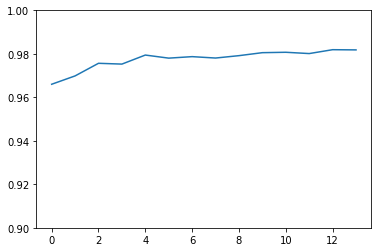

In [24]:
CNN_val_acc = CNN_history.history['val_acc']

plt.plot(CNN_val_acc)
plt.ylim([0.9 , 1])
plt.show()

In [25]:
# get confusion matrix

predicted_test = model_CNN.predict(predictors_test_CNN)
predicted_test = np.argmax(predicted_test, axis = 1)
#(target_test)

#confusion_matrix([0, 1,2 , 3, 0], [0, 2, 3, 1, 0])

In [26]:
confusion_matrix_CNN = confusion_matrix(predicted_test, df_test.arrythmia_type)
print(confusion_matrix_CNN)
#predicted_test[20000]

[[18028   133    71    35    20]
 [   50   416     3     0     2]
 [   28     7  1351    12     2]
 [    2     0    16   115     0]
 [   10     0     7     0  1584]]


In [27]:
#type(confusion_matrix_)
normalized_confusion_matrix_CNN = confusion_matrix_CNN/confusion_matrix_CNN.sum(axis = 1, keepdims = True)

print(np.around(normalized_confusion_matrix_CNN, 3))

np.mean(np.diag(normalized_confusion_matrix_CNN))

[[0.986 0.007 0.004 0.002 0.001]
 [0.106 0.883 0.006 0.    0.004]
 [0.02  0.005 0.965 0.009 0.001]
 [0.015 0.    0.12  0.865 0.   ]
 [0.006 0.    0.004 0.    0.989]]


0.9376214800347942

In [ ]:
# Confusion matrix comparison to paper: Number of sample points in each category, also normalization
# Skip connection: 

# From 12.3.1 in springboard

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, callbacks=[early_stopping_monitor], epochs=30)
